<a href="https://colab.research.google.com/github/hyo04/ML-Coursework-2/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

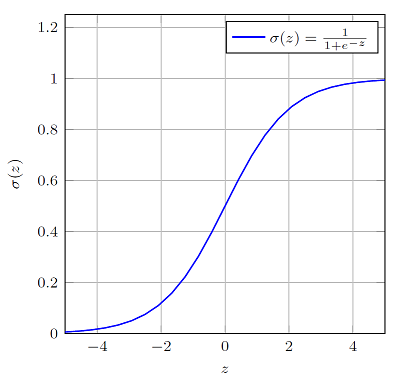

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

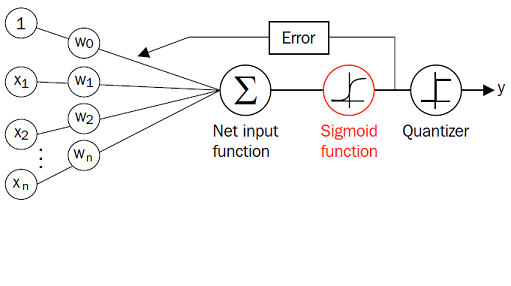

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

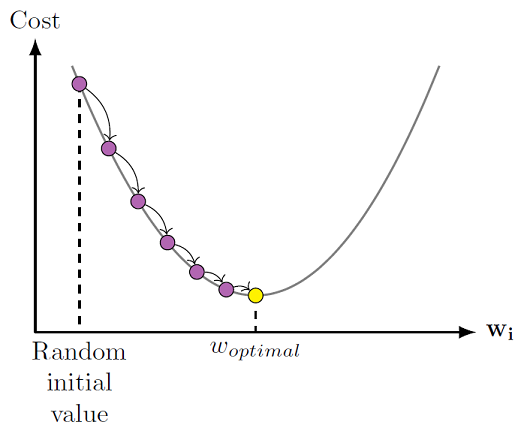


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [4]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

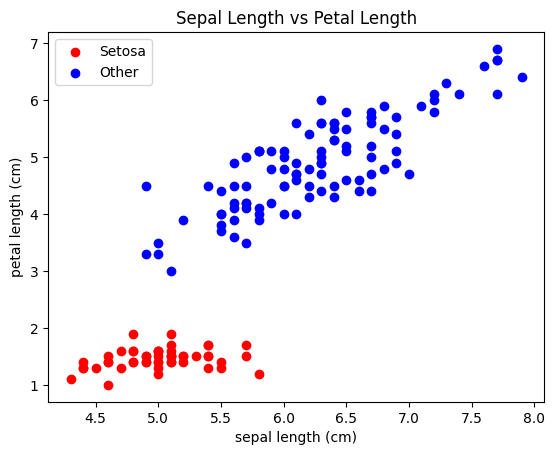

In [6]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [8]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [9]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [10]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [11]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        # Print the loss more often (100 -> 20)
        if i % 20 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 21 	 cost: 0.5202781214468376 	 weights: [0.00266043 0.06746285 0.1551652 ] 	
iteration: 41 	 cost: 0.4836039235855384 	 weights: [-0.01045403  0.03582741  0.23284296] 	
iteration: 61 	 cost: 0.45179350188530465 	 weights: [-0.02444612 -0.00325415  0.3007515 ] 	
iteration: 81 	 cost: 0.4230932107953466 	 weights: [-0.03791988 -0.04143062  0.36461001] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 121 	 cost: 0.37373097992717663 	 weights: [-0.06283583 -0.11179666  0.48327542] 	
iteration: 141 	 cost: 0.3525110872789239 	 weights: [-0.07433481 -0.1440787   0.53853029] 	
iteration: 161 	 cost: 0.33326560485993184 	 weights: [-0.08525288 -0.17461187  0.59128388] 	
iteration: 181 	 cost: 0.3157753984466526 	 weights: [-0.09563273 -0.20353402  0.64169003] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319

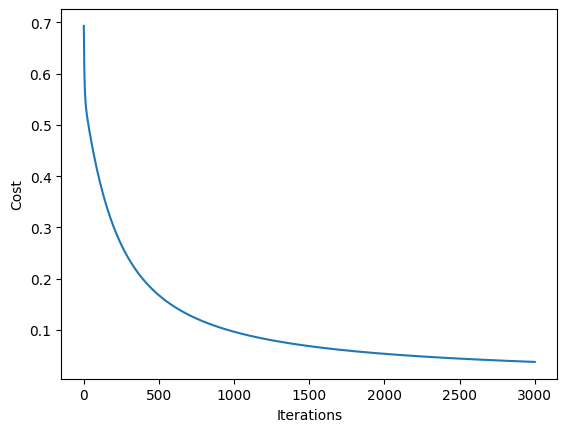

In [12]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [13]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


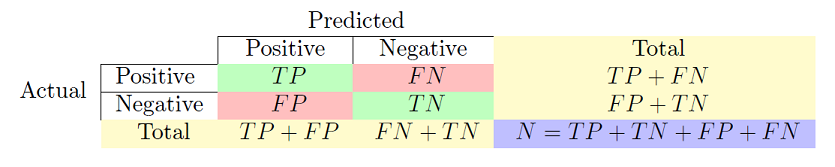

In [14]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


Having two separate datasets help to avoid overfitting. We ideally want the model to provide a good generalisation to unseen data instead of providing a perfect prediction to seen data. By having two separate sets, the training error can be used to determine how well the model fits to the seen data, and the test error can be used to check if the model has overfit or not. If the test error is much greater than the training error, the model would be considered to have overfitted. In conclusion, splitting the dataset allows prevention of overfitting and underfitting as well as prediction on real world (unseen) data.

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00175    0.01297917 0.01415417] 	
iteration: 21 	 cost: 0.5149088501091226 	 weights: [0.00351455 0.07102094 0.15571444] 	
iteration: 41 	 cost: 0.47941997391159263 	 weights: [-0.00915925  0.04043539  0.23233055] 	
iteration: 61 	 cost: 0.4486837802756897 	 weights: [-0.02279106  0.00203214  0.29911804] 	
iteration: 81 	 cost: 0.4208883505285736 	 weights: [-0.03594873 -0.03561351  0.36194227] 	
iteration: 101 	 cost: 0.39572216211388606 	 weights: [-0.04845663 -0.07135904  0.42177002] 	
iteration: 121 	 cost: 0.3729177530877117 	 weights: [-0.06032465 -0.1051505   0.47887107] 	
iteration: 141 	 cost: 0.35222697574248285 	 weights: [-0.07159139 -0.13710245  0.53341042] 	
iteration: 161 	 cost: 0.33342302086872794 	 weights: [-0.08229863 -0.16735064  0.58553681] 	
iteration: 181 	 cost: 0.31630112001680877 	 weights: [-0.09248673 -0.1960267   0.63539435] 	
iteration: 201 	 cost: 0.30067804412647503 	 weights: [-0.10219362 -0.2232534

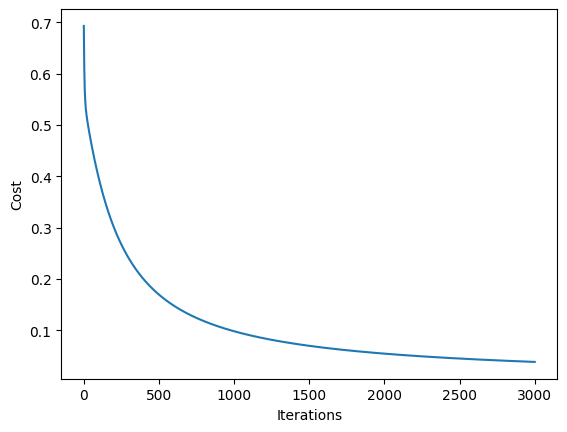

In [15]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

test_ratio = 0.2
test_size = int(len(indices) * test_ratio)

test_idx = indices[:test_size]
train_idx = indices[test_size:]

X_train = X[train_idx]
X_test  = X[test_idx]
Y_train = y[train_idx]
Y_test  = y[test_idx]

model_weights = fit(alpha, num_iter, X_train, Y_train)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = Y_test.astype('int')

In [16]:
conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result after data splitting: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result after data splitting: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%


Report: As seen in the confusion matrix above, the model shows a 100% accuracy on the test data. Moreover, the accuracy was constant at 93.33% for 10 consecutive trials, showing robustness to random train-test splits. The linear separability of Setosa vs. non-Setosa based on sepal length and petal length likely contributes strongly to this stability, as Setosa is well-separated from the other two Iris species in these two feature dimensions.However, this does not necessarily guarantee that the classifier would achieve the same performance when distinguishing all three Iris species simultaneously. Therefore, this train-test data split is highly effective for binary Setosa vs. non-Setosa classification.


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.00974167 0.0049    ] 	
iteration: 21 	 cost: 0.6430571801760993 	 weights: [0.01479031 0.08244226 0.01923463] 	
iteration: 41 	 cost: 0.6388392196303125 	 weights: [ 0.01899363  0.10204882 -0.00119577] 	
iteration: 61 	 cost: 0.6352729947303362 	 weights: [ 0.0222895   0.11705535 -0.02296501] 	
iteration: 81 	 cost: 0.6320833533987205 	 weights: [ 0.02527302  0.13100865 -0.04373821] 	
iteration: 101 	 cost: 0.6292265311613648 	 weights: [ 0.0280056   0.14422912 -0.06340109] 	
iteration: 121 	 cost: 0.6266651076865772 	 weights: [ 0.03050574  0.15678086 -0.08200967] 	
iteration: 141 	 cost: 0.6243660807223246 	 weights: [ 0.03278773  0.16870534 -0.09962908] 	
iteration: 161 	 cost: 0.6223003394270553 	 weights: [ 0.03486466  0.18003986 -0.11632098] 	
iteration: 181 	 cost: 0.6204421989124235 	 weights: [ 0.03674876  0.19081921 -0.13214287] 	
iteration: 201 	 cost: 0.6187689866239381 	 weights: [ 0.03845144  0.20107585 -0.1

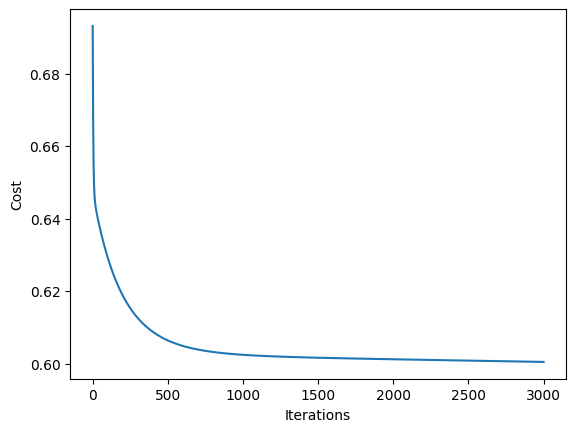

Final weights for Versicolor classification:  [-0.12340104  0.46437988 -0.47761026]
Confusion matrix result for Versicolor classification: 
[[ 0. 10.]
 [ 0. 20.]]
accuracy = 66.67%


In [17]:
labels = iris_data.iloc[:,4]

# Versicolor (at index 1) is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 1, 0, 1)

X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

test_ratio = 0.2
test_size = int(len(indices) * test_ratio)

test_idx = indices[:test_size]
train_idx = indices[test_size:]

X_train = X[train_idx]
X_test  = X[test_idx]
Y_train = y[train_idx]
Y_test  = y[test_idx]

model_weights = fit(alpha, num_iter, X_train, Y_train)
print("Final weights for Versicolor classification: ", model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = Y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result for Versicolor classification: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.00825833 0.0012875 ] 	
iteration: 21 	 cost: 0.6442255035603973 	 weights: [ 0.02386814  0.08615479 -0.03064041] 	
iteration: 41 	 cost: 0.6206514186053004 	 weights: [ 0.03907427  0.12508152 -0.08485315] 	
iteration: 61 	 cost: 0.5995646919358618 	 weights: [ 0.05321332  0.15973293 -0.13775815] 	
iteration: 81 	 cost: 0.5805780839876152 	 weights: [ 0.06671232  0.19254017 -0.18798991] 	
iteration: 101 	 cost: 0.5634341533404098 	 weights: [ 0.07964231  0.22378681 -0.23565144] 	
iteration: 121 	 cost: 0.5479072939762997 	 weights: [ 0.09204728  0.25360073 -0.28093583] 	
iteration: 141 	 cost: 0.5338006193253853 	 weights: [ 0.10396662  0.28209117 -0.32402969] 	
iteration: 161 	 cost: 0.5209429418991427 	 weights: [ 0.11543669  0.30935826 -0.3651061 ] 	
iteration: 181 	 cost: 0.5091857448583522 	 weights: [ 0.12649096  0.33549393 -0.40432422] 	
iteration: 201 	 cost: 0.498400309648957 	 weights: [ 0.13716016  0.36058241 -0

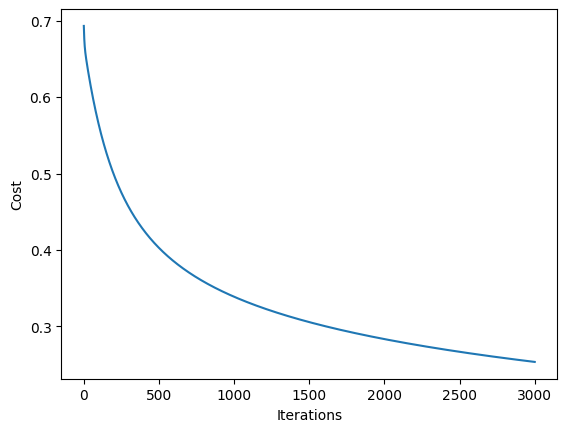

Final weights for Virginica classification:  [ 0.81232268  1.66930355 -2.30288239]
Confusion matrix result for Virginica classification: 
[[11.  1.]
 [ 2. 16.]]
accuracy = 90.00%


In [18]:
labels = iris_data.iloc[:,4]

# Virginica (at index 2) is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 2, 0, 1)

X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

test_ratio = 0.2
test_size = int(len(indices) * test_ratio)

test_idx = indices[:test_size]
train_idx = indices[test_size:]

X_train = X[train_idx]
X_test  = X[test_idx]
Y_train = y[train_idx]
Y_test  = y[test_idx]

model_weights = fit(alpha, num_iter, X_train, Y_train)
print("Final weights for Virginica classification: ", model_weights)


predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = Y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result for Virginica classification: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Report:

## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


Learning rate = 0.0001:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [1.66666667e-05 7.25666667e-05 2.83333333e-06] 	
iteration: 21 	 cost: 0.6920567745008661 	 weights: [3.47649390e-04 1.50988968e-03 5.01455320e-05] 	
iteration: 41 	 cost: 0.6910059149252128 	 weights: [6.74231750e-04 2.92099005e-03 7.99591574e-05] 	
iteration: 61 	 cost: 0.68999262071147 	 weights: [9.96524337e-04 4.30653383e-03 9.27331092e-05] 	
iteration: 81 	 cost: 0.6890150097018992 	 weights: [1.31463505e-03 5.66717091e-03 8.89151443e-05] 	
iteration: 101 	 cost: 0.6880712939894913 	 weights: [1.62866914e-03 7.00353525e-03 6.89420591e-05] 	
iteration: 121 	 cost: 0.6871597753970604 	 weights: [1.93872928e-03 8.31624519e-03 3.32398781e-05] 	
iteration: 141 	 cost: 0.6862788411448073 	 weights: [ 2.24491557e-03  9.60590372e-03 -1.77759520e-05] 	
iteration: 161 	 cost: 0.685426959702167 	 weights: [ 2.54732562e-03  1.08730988e-02 -8.37003642e-05] 	
iteration: 181 	 cost: 0.68460267681934 	 weights: [ 0.002846

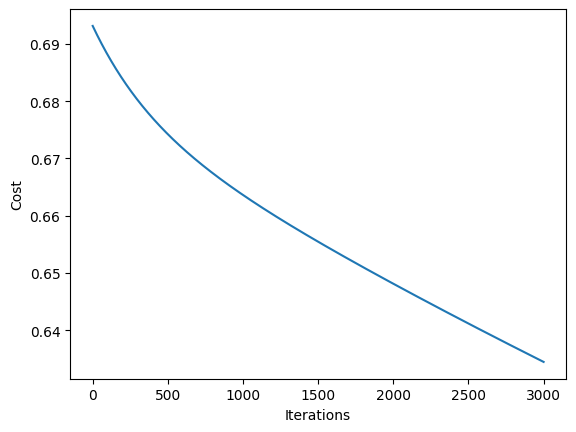

Confusion matrix result: 
[[  0.  50.]
 [  0. 100.]]
accuracy = 66.67%
-------------------------------------------------------


In [19]:
weights_list = []
accuracy_list = []

# ALPHA = 0.0001
alpha = 0.0001
print('Learning rate = 0.0001:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 0.001:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [1.66666667e-04 7.25666667e-04 2.83333333e-05] 	
iteration: 21 	 cost: 0.6837763799305456 	 weights: [ 0.0032811   0.01393531 -0.00027338] 	
iteration: 41 	 cost: 0.6769740120619102 	 weights: [ 0.00604438  0.02505802 -0.00195614] 	
iteration: 61 	 cost: 0.671708734178241 	 weights: [ 0.00853578  0.03457128 -0.00469114] 	
iteration: 81 	 cost: 0.6673703533921435 	 weights: [ 0.01081617  0.04284151 -0.00822627] 	
iteration: 101 	 cost: 0.6635977111431112 	 weights: [ 0.01293217  0.05014934 -0.01236865] 	
iteration: 121 	 cost: 0.6601765144911275 	 weights: [ 0.01491955  0.05670982 -0.01697062] 	
iteration: 141 	 cost: 0.6569791848963361 	 weights: [ 0.01680574  0.06268802 -0.02191901] 	
iteration: 161 	 cost: 0.6539294851133807 	 weights: [ 0.01861189  0.06821087 -0.02712687] 	
iteration: 181 	 cost: 0.650981673752273 	 weights: [ 0.02035427  0.07337624 -0.03252728] 	
iteration: 201 	 cost: 0.6481081798589259 	 we

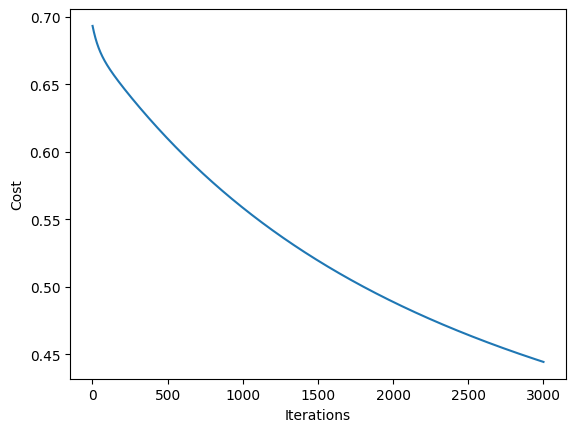

Confusion matrix result: 
[[42.  8.]
 [ 3. 97.]]
accuracy = 92.67%
-------------------------------------------------------


In [20]:
# ALPHA = 0.001
alpha = 0.001
print('Learning rate = 0.001:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 0.01:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.00725667 0.00028333] 	
iteration: 21 	 cost: 0.6480446648190143 	 weights: [ 0.022883    0.08086417 -0.04039157] 	
iteration: 41 	 cost: 0.6215774198683419 	 weights: [ 0.03821736  0.12165348 -0.09838802] 	
iteration: 61 	 cost: 0.5980766972182475 	 weights: [ 0.05246722  0.1583136  -0.15434854] 	
iteration: 81 	 cost: 0.5771008945853605 	 weights: [ 0.06600627  0.19291408 -0.20722544] 	
iteration: 101 	 cost: 0.5583205243337083 	 weights: [ 0.07891018  0.22573841 -0.25718442] 	
iteration: 121 	 cost: 0.5414493395173923 	 weights: [ 0.09123089  0.25693765 -0.3044597 ] 	
iteration: 141 	 cost: 0.5262399789975667 	 weights: [ 0.10301518  0.28664336 -0.34927399] 	
iteration: 161 	 cost: 0.5124795061467791 	 weights: [ 0.11430594  0.3149755  -0.39183254] 	
iteration: 181 	 cost: 0.4999850088847854 	 weights: [ 0.12514239  0.34204347 -0.43232296] 	
iteration: 201 	 cost: 0.48859949339962006 	 weights: [ 0

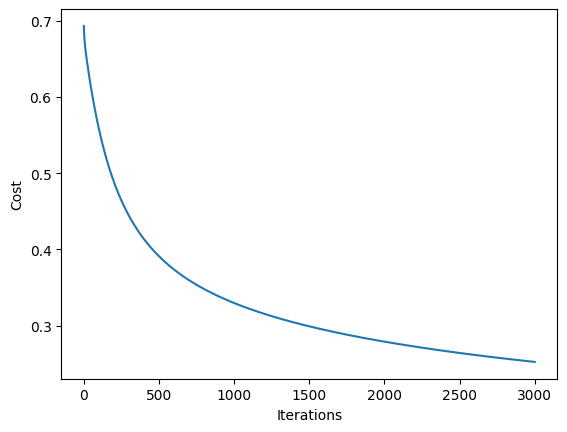

Confusion matrix result: 
[[48.  2.]
 [ 7. 93.]]
accuracy = 94.00%
-------------------------------------------------------


In [21]:
# ALPHA = 0.01
alpha = 0.01
print('Learning rate = 0.01:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 0.1:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.01666667 0.07256667 0.00283333] 	
iteration: 21 	 cost: 0.48728239116641486 	 weights: [ 0.14121279  0.38242988 -0.49239831] 	
iteration: 41 	 cost: 0.4125130958282176 	 weights: [ 0.22722105  0.59092152 -0.79708239] 	
iteration: 61 	 cost: 0.3728324950057614 	 weights: [ 0.29402997  0.74579692 -1.01834183] 	
iteration: 81 	 cost: 0.34741860665289354 	 weights: [ 0.35021572  0.87090779 -1.19485626] 	
iteration: 101 	 cost: 0.3291826849252795 	 weights: [ 0.3997533   0.97734249 -1.3439661 ] 	
iteration: 121 	 cost: 0.31511374375007184 	 weights: [ 0.44474545  1.07098171 -1.47462409] 	
iteration: 141 	 cost: 0.30371736124291854 	 weights: [ 0.48642213  1.15527208 -1.59197426] 	
iteration: 161 	 cost: 0.29416387188744153 	 weights: [ 0.52555944  1.23239207 -1.6992191 ] 	
iteration: 181 	 cost: 0.2859524473695873 	 weights: [ 0.56267663  1.3038016  -1.79847925] 	
iteration: 201 	 cost: 0.27876055284828427 	 weights:

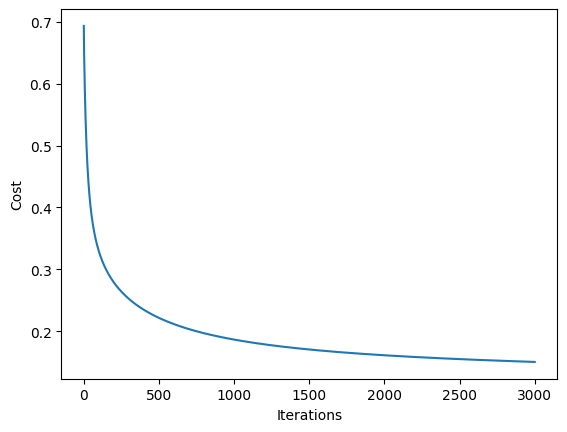

Confusion matrix result: 
[[46.  4.]
 [ 5. 95.]]
accuracy = 94.00%
-------------------------------------------------------


In [22]:
# ALPHA = 0.1
alpha = 0.1
print('Learning rate = 0.1:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 1:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.16666667 0.72566667 0.02833333] 	
iteration: 21 	 cost: 3.359973744404477 	 weights: [ 0.86519939  1.51762232 -4.6571001 ] 	
iteration: 41 	 cost: 0.9363719943738544 	 weights: [ 1.49790576  2.79394397 -7.03768575] 	
iteration: 61 	 cost: 1.5141630319571757 	 weights: [ 2.01003727  3.88787451 -8.49337579] 	
iteration: 81 	 cost: 1.4894108478896884 	 weights: [ 2.51977954  5.01280393 -9.8538979 ] 	
iteration: 101 	 cost: 1.3910085534486691 	 weights: [  3.01699325   6.11125421 -11.15065294] 	
iteration: 121 	 cost: 1.1732953288051893 	 weights: [  3.49872461   7.20371238 -12.30817475] 	
iteration: 141 	 cost: 0.8770224975434142 	 weights: [  3.94903408   8.27324968 -13.17993081] 	
iteration: 161 	 cost: 0.17004844997275187 	 weights: [  4.27062748   9.25579048 -12.83652596] 	
iteration: 181 	 cost: 0.15831849472085688 	 weights: [  4.36619746   9.25826813 -12.70689281] 	
iteration: 201 	 cost: 0.15733719148506553 	

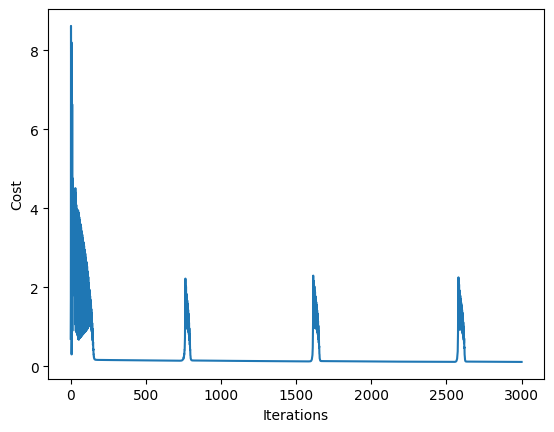

Confusion matrix result: 
[[47.  3.]
 [ 3. 97.]]
accuracy = 96.00%
-------------------------------------------------------


In [23]:
# ALPHA = 1
alpha = 1
print('Learning rate = 1:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 10:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [1.66666667 7.25666667 0.28333333] 	
iteration: 21 	 cost: 11.497508377793798 	 weights: [  8.80103207  13.51773548 -52.21972598] 	
iteration: 41 	 cost: 8.524194403047005 	 weights: [ 14.90200157  26.48235954 -72.9296187 ] 	
iteration: 61 	 cost: 11.490584932154222 	 weights: [ 20.48625597  41.17983469 -83.56958275] 	
iteration: 81 	 cost: 8.667539455098991 	 weights: [ 25.05008406  49.16947531 -99.79273505] 	
iteration: 101 	 cost: 7.0314374275477896 	 weights: [  30.07789042   60.59858288 -112.25978894] 	
iteration: 121 	 cost: 7.199975268139436 	 weights: [  34.5843666    70.16848784 -123.69213441] 	
iteration: 141 	 cost: 5.795614177534914 	 weights: [  39.01225533   80.8396691  -130.93910882] 	
iteration: 161 	 cost: 1.0883776661630613 	 weights: [  43.4178369    94.94668206 -131.06665669] 	
iteration: 181 	 cost: 1.1954372006353378 	 weights: [  44.0676851    93.58486728 -130.60508129] 	
iteration: 201 	 cost

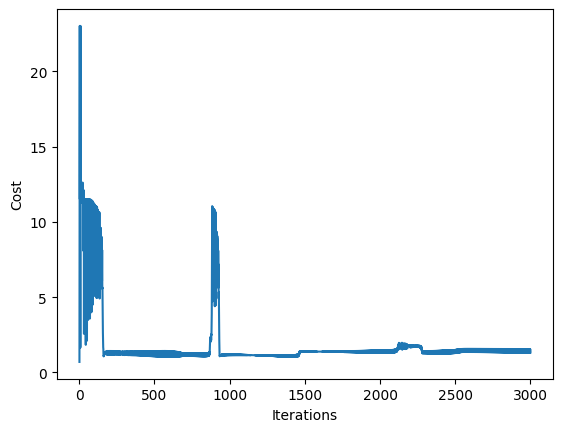

Confusion matrix result: 
[[38. 12.]
 [ 1. 99.]]
accuracy = 91.33%
-------------------------------------------------------


In [24]:
# ALPHA = 10
alpha = 10
print('Learning rate = 10:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

Learning rate = 100:
iteration: 1 	 cost: 0.6931471805599433 	 weights: [16.66666667 72.56666667  2.83333333] 	
iteration: 21 	 cost: 11.512925464970227 	 weights: [  93.45901284  159.86837201 -522.49672497] 	
iteration: 41 	 cost: 4.030058507352401 	 weights: [ 163.89067973  365.41939999 -642.04892998] 	
iteration: 61 	 cost: 11.262166873655017 	 weights: [ 199.38191947  379.35372821 -864.73460829] 	
iteration: 81 	 cost: 11.512925464970227 	 weights: [ 253.46471921  516.99953606 -975.17031801] 	
iteration: 101 	 cost: 7.722827268951816 	 weights: [  304.79081099   636.5819145  -1096.72687628] 	
iteration: 121 	 cost: 6.5160889204413674 	 weights: [  352.31129892   750.1789637  -1191.50038326] 	
iteration: 141 	 cost: 6.639641442502937 	 weights: [  391.95906648   826.89340846 -1286.15426166] 	
iteration: 161 	 cost: 2.3884868686046214 	 weights: [  425.27887403   916.72593249 -1278.53383949] 	
iteration: 181 	 cost: 2.496519920288584 	 weights: [  431.82024321   909.28874448 -1267.81

/tmp/ipython-input-490554598.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


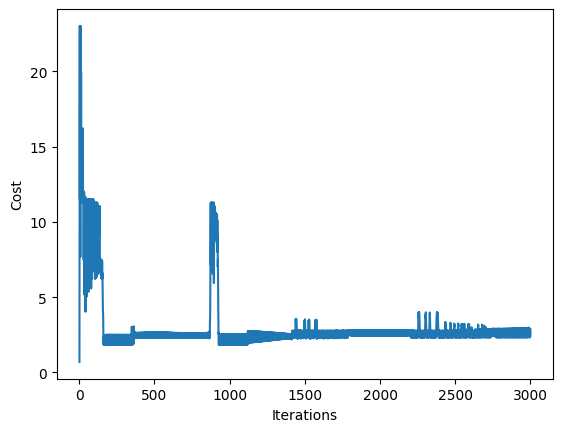

Confusion matrix result: 
[[37. 13.]
 [ 1. 99.]]
accuracy = 90.67%
-------------------------------------------------------


In [25]:
# ALPHA = 100
alpha = 100
print('Learning rate = 100:')
model_weights = fit(alpha, num_iter, X,y)
weights_list.append(model_weights)

predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
accuracy_list.append(accuracy)
print('accuracy = {:0.2f}%'.format(accuracy*100))
print('-------------------------------------------------------')

In [26]:
import pandas as pd
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Convert weight vectors to separate columns
df = pd.DataFrame({
    "alpha": alphas,
    "w0": [w[0] for w in weights_list],
    "w1": [w[1] for w in weights_list],
    "w2": [w[2] for w in weights_list],
    "accuracy": accuracy_list
})

print(df)


      alpha           w0          w1          w2  accuracy
0    0.0001     0.029925    0.099859   -0.066485  0.666667
1    0.0010     0.181859    0.481483   -0.638318  0.926667
2    0.0100     0.755595    1.649492   -2.279785  0.940000
3    0.1000     3.073557    3.909451   -5.626070  0.940000
4    1.0000    15.233891    6.156543  -10.967596  0.960000
5   10.0000   141.498205   54.948705  -93.913552  0.913333
6  100.0000  1409.458293  558.601739 -946.770714  0.906667


The experimental results show that the learning rate α has a direct influence on how gradient descent behaves during training. When α is set to a very small value (0.0001), the updates to the weights are minimal, so the algorithm makes slow progress towards the minimum of the loss function. In this case, the model does not fully converge within the fixed number of iterations, which leads to weaker performance and lower accuracy.

As the learning rate increases to moderate values, the algorithm moves more efficiently along the gradient. These settings allow the model to reach a good solution within the allotted iterations, and this is reflected in the higher accuracies and more reasonable weight magnitudes. This range of α provides a balance between speed and stability.

When the learning rate becomes too large, the behaviour changes noticeably. The weight values grow rapidly, which suggests that the updates jump past the minimum rather than moving towards it. This “overshooting” effect makes the optimisation process unstable. Although the accuracy does not collapse immediately, the results become less dependable and the weight values indicate that the algorithm is no longer following a smooth convergence path.